In [1]:
import astropy
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import scipy.optimize as opt
import specutils
from specutils.fitting import continuum as cont
from scipy.signal import peak_widths
from scipy.ndimage.filters import gaussian_filter1d

'''dark1 = fits.getdata('DARK1-001.FIT')
dark2 = fits.getdata('DARK1-002.FIT')
dark3 = fits.getdata('DARK1-003.FIT')
masterDark = numpy.median(numpy.dstack((dark1, dark2, dark3)), axis = 2)'''

In [47]:
im1 = fits.getdata('01-1-600s.FIT')
im2 = fits.getdata('01-2-600s.FIT')
im3 = fits.getdata('01-3-600s.FIT')
masterIm = np.median(np.dstack((im1, im2, im3)), axis = 2)

<class 'numpy.ndarray'>


863


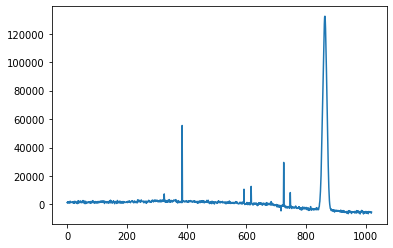

In [3]:
imRowSums = np.sum(masterIm, axis = 1)
plt.plot(imRowSums)
maxInd = np.argmax(imRowSums)
print(maxInd)

In [27]:
def sliceIndices(rows):
  fwhm = peak_widths(rows, [np.argmax(rows)])
  start = int(np.round(fwhm[2]))
  #print(start)
  end = int(np.round(fwhm[3]))
  #print(end)
  return (start, end)

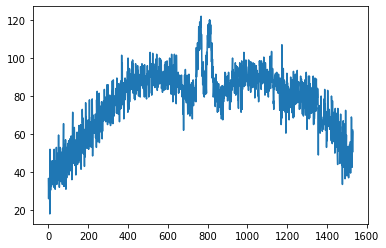

In [28]:
startInd = sliceIndices(imRowSums)[0]
endInd = sliceIndices(imRowSums)[1]
slicedIm = masterIm[startInd : endInd]

rawSpec = np.median(slicedIm, axis = 0)
plt.plot(rawSpec)

In [29]:
def smooth(rawSpec, lvl):
    smoothSpec = rawSpec.copy()
    smoothOrd = lvl #5
    for i in range(len(smoothSpec)):
        leftNeighbours = max(0,  i - smoothOrd)
        rightNeighbours = min(len(smoothSpec)-1, i + smoothOrd)
        smoothSpec[i] = np.mean(rawSpec[ leftNeighbours : rightNeighbours])
    return smoothSpec

def max(a,b):
    return a if a>=b else b
    
def min(a,b):
    return b if a>=b else a

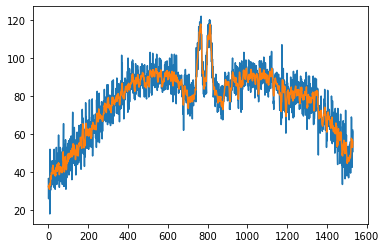

In [30]:
plt.plot(rawSpec)
plt.plot(smooth(rawSpec, 3))

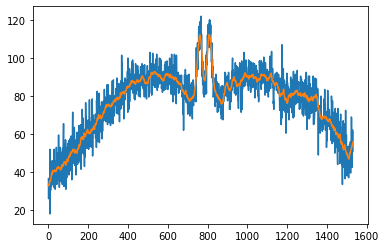

In [49]:
plt.plot(rawSpec)
plt.plot(smooth(rawSpec, 10))


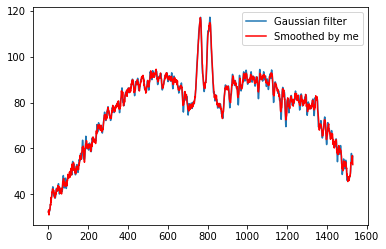

In [52]:
ysmoothed = gaussian_filter1d(rawSpec, sigma=2)

#plt.plot(rawSpec, label = 'Raw')



smoothSpec = smooth(rawSpec, 5)

plt.plot(ysmoothed, label = 'Gaussian filter')

plt.plot(smooth(rawSpec, 5), label = 'Smoothed by me', color='r')
plt.legend()

In [33]:
def medianSmooth(rawSpec, lvl):
    smoothSpec = rawSpec.copy()
    smoothOrd = lvl
    for i in range(len(smoothSpec)):
        neighbourhood = rawSpec[max(0,i - smoothOrd) : min(len(smoothSpec-1), i + smoothOrd)]
        smoothSpec[i] = np.median(neighbourhood)
    return smoothSpec

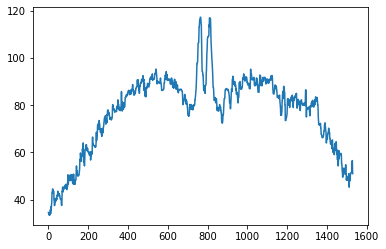

In [34]:
plt.plot(medianSmooth(rawSpec, 5))

In [35]:
fittedSpecPoly = np.polyfit(range(1, len(rawSpec)+1) , rawSpec, 4)
print(fittedSpecPoly)

[-8.75615169e-11  2.84379222e-07 -3.82982285e-04  2.47190510e-01
  2.80980221e+01]


In [36]:
m = np.median(rawSpec)
print(m)
rawSpecNorm = rawSpec / m

81.5


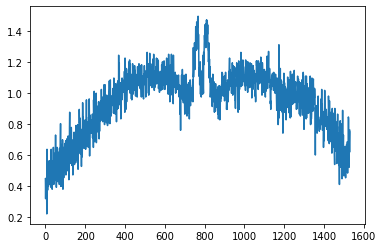

In [37]:
plt.plot(rawSpecNorm)

# This is a polynomial of order <built-in function ord>.


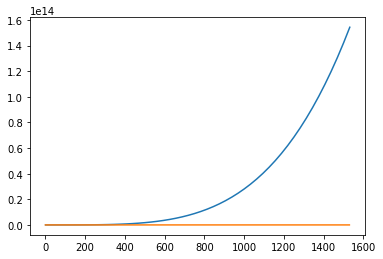

In [38]:
def PolyEval(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {ord}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x = np.linspace(1, len(rawSpecNorm) + 1)
plt.plot(x, PolyEval(x, fittedSpecPoly))
plt.plot(rawSpec)
plt.show()

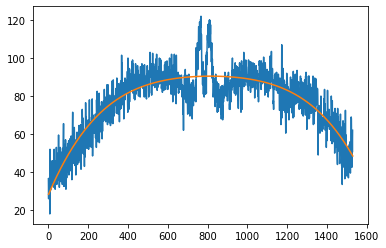

In [39]:
x = np.linspace(1,len(rawSpec),len(rawSpec))
y = [np.polyval(fittedSpecPoly, i) for i in x]
plt.plot(rawSpec)
plt.plot(x,y)


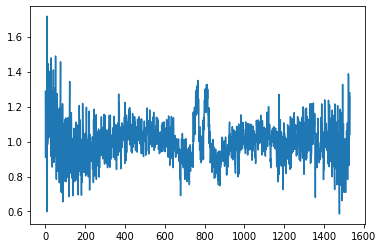

In [40]:
veryMuchCoolSpec = rawSpec / y
plt.plot(veryMuchCoolSpec)

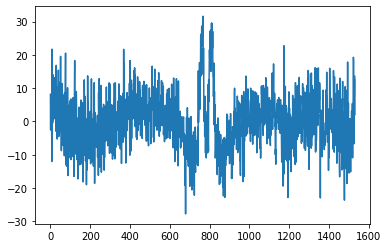

In [41]:
veryMuchCoolSpec = rawSpec - y
plt.plot(veryMuchCoolSpec)

In [42]:
#def fitPolynomial(spec)
smoothSpec = smooth(rawSpec, 5)
fittedSmoothSpecPoly = np.polyfit(range(1, len(smoothSpec)+1) , smoothSpec, 5)

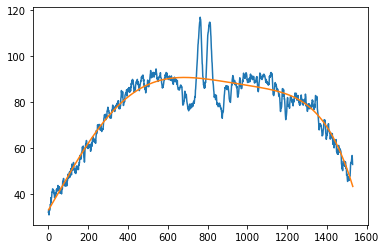

In [43]:
x = np.linspace(1,len(smoothSpec),len(smoothSpec))
y = [np.polyval(fittedSmoothSpecPoly, i) for i in x]
plt.plot(smoothSpec)
plt.plot(x,y)

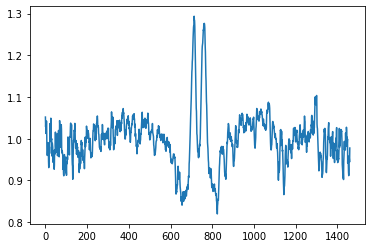

In [44]:
veryMuchCoolSmoothSpec = smoothSpec / y
plt.plot(veryMuchCoolSmoothSpec[50:1510])

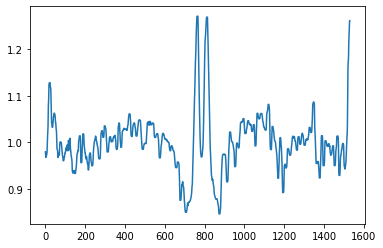

In [45]:
plt.plot(medianSmooth(veryMuchCoolSmoothSpec, 5))